In [1]:
import numpy as np
import numpy.fft as nf
import matplotlib.pyplot as plt
import scipy.io.wavfile as wav

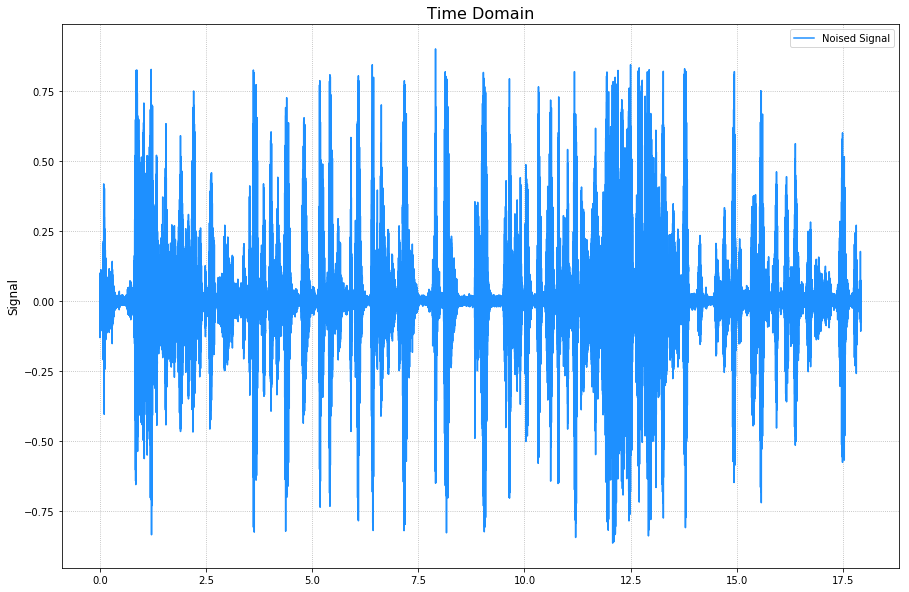

In [160]:
sample_rate, signals = wav.read("20191223_test_1.wav")

signals = signals/(2**15)

times = np.arange(len(signals))/sample_rate
plt.figure('Filter',figsize=(15,10))
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')
plt.plot(times,signals,color='dodgerblue',label='Noised Signal')
plt.legend()


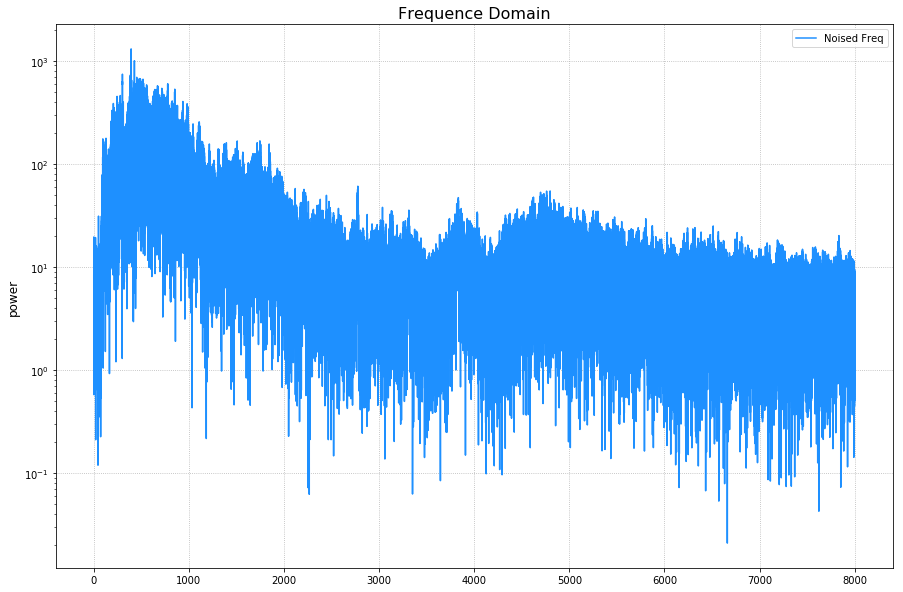

In [161]:
freqs = nf.fftfreq(signals.size, 1/sample_rate)
complex_array = nf.fft(signals)
pows = np.abs(complex_array)

plt.figure(figsize=(15,10))
plt.title('Frequence Domain',fontsize=16)
plt.ylabel('power',fontsize=12)
plt.grid(linestyle=':')
plt.semilogy(freqs[freqs>0],pows[freqs>0],color='dodgerblue',label='Noised Freq')
plt.legend()


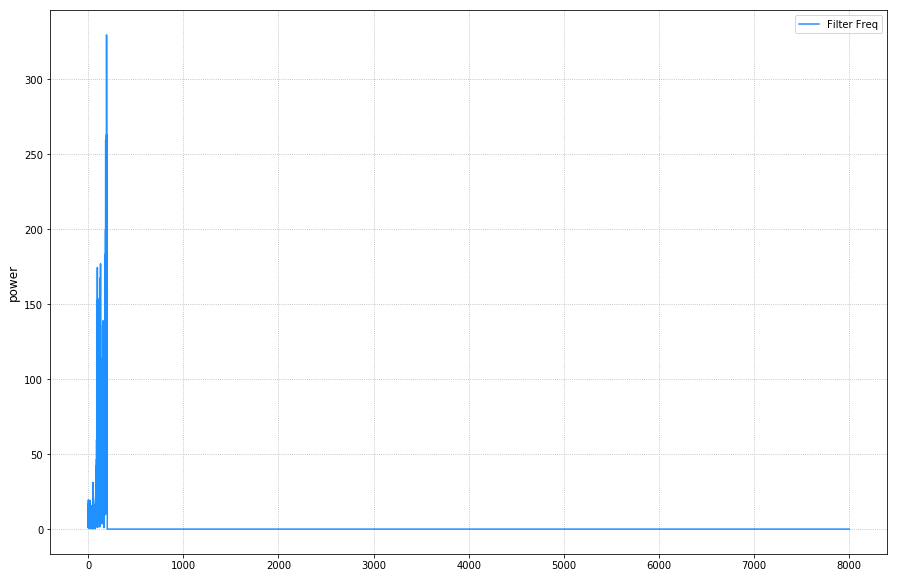

In [164]:
noised_idx = np.where(freqs > 200)[0] 
ca = complex_array[:]
ca[noised_idx] = 0 
filter_pows = np.abs(ca)

plt.figure(figsize=(15,10))
plt.ylabel('power',fontsize=12)
plt.grid(linestyle=':')
plt.plot(freqs[freqs>0],filter_pows[freqs>0],color='dodgerblue',label='Filter Freq')
plt.legend()


In [165]:
noised_idx

array([  3585,   3586,   3587, ..., 143357, 143358, 143359], dtype=int64)

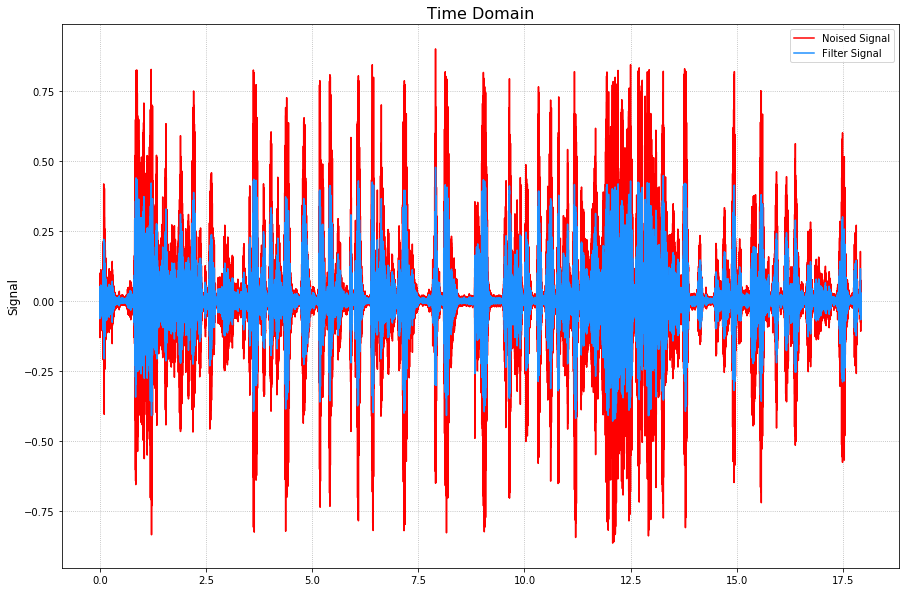

In [166]:
filter_sigs = nf.ifft(ca)

plt.figure(figsize=(15,10))
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')

plt.plot(times,signals,color='red',label='Noised Signal')
plt.plot(times,filter_sigs,color='dodgerblue',label='Filter Signal')
plt.legend()



In [167]:
filter_sigs = (filter_sigs*(2**15)).astype('i2')
wav.write('filter.wav',sample_rate,filter_sigs)

C:\Anaconda3\envs\tensorflow-gpu2\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


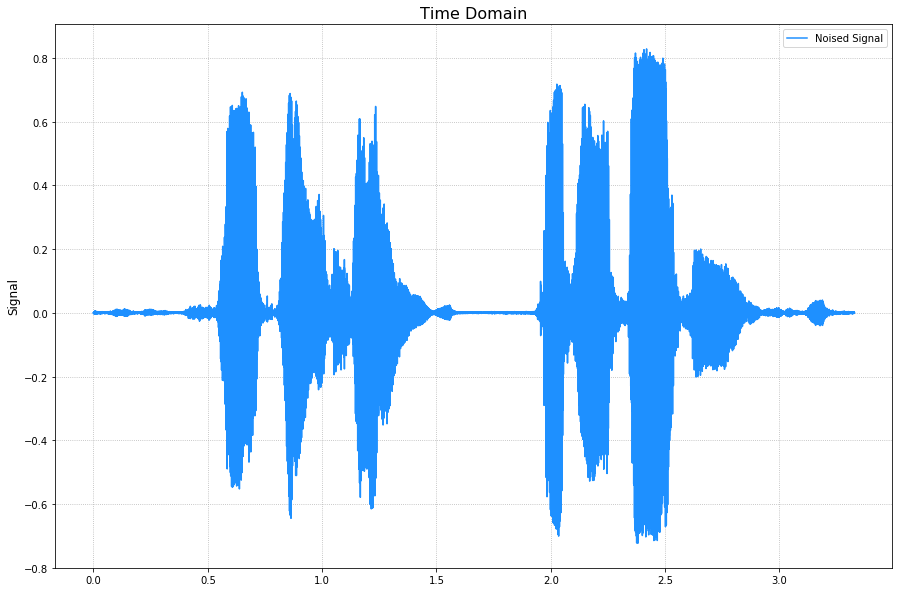

In [173]:
sample_rate, signals = wav.read("NTUH_2020_0221_34.wav")

signals = signals/(2**15)

times = np.arange(len(signals))/sample_rate
plt.figure('Filter',figsize=(15,10))
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')
plt.plot(times,signals,color='dodgerblue',label='Noised Signal')
plt.legend()


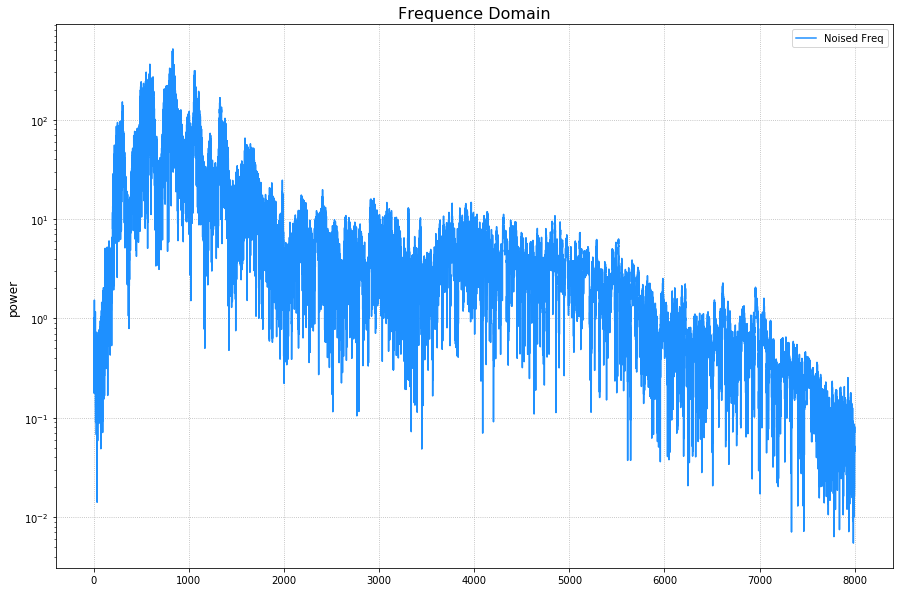

In [174]:
freqs = nf.fftfreq(signals.size, 1/sample_rate)
complex_array = nf.fft(signals)
pows = np.abs(complex_array)

plt.figure(figsize=(15,10))
plt.title('Frequence Domain',fontsize=16)
plt.ylabel('power',fontsize=12)
plt.grid(linestyle=':')
plt.semilogy(freqs[freqs>0],pows[freqs>0],color='dodgerblue',label='Noised Freq')
plt.legend()


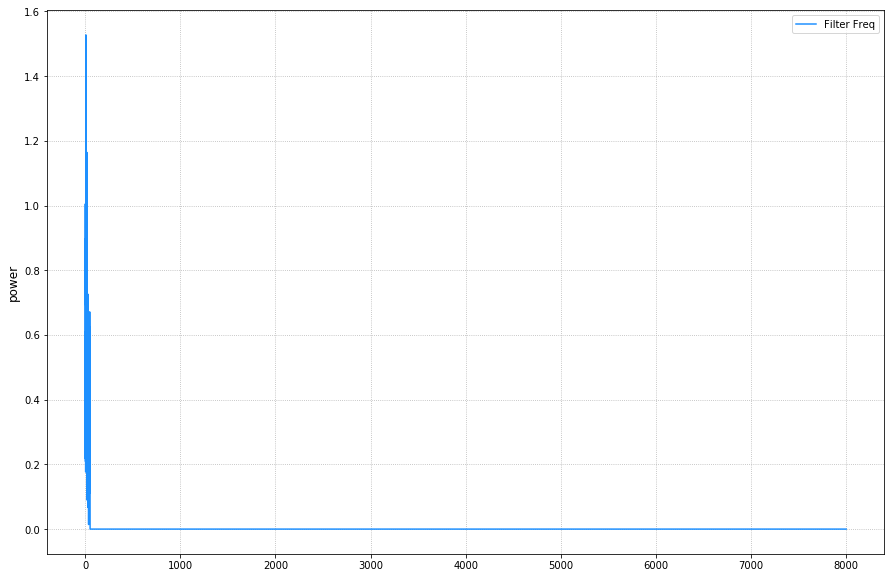

In [177]:
noised_idx = np.where(freqs > 50)[0] 
ca = complex_array[:]
ca[noised_idx] = 0 #高通滤波
filter_pows = np.abs(ca)

plt.figure(figsize=(15,10))
plt.ylabel('power',fontsize=12)
plt.grid(linestyle=':')
plt.plot(freqs[freqs>0],filter_pows[freqs>0],color='dodgerblue',label='Filter Freq')
plt.legend()



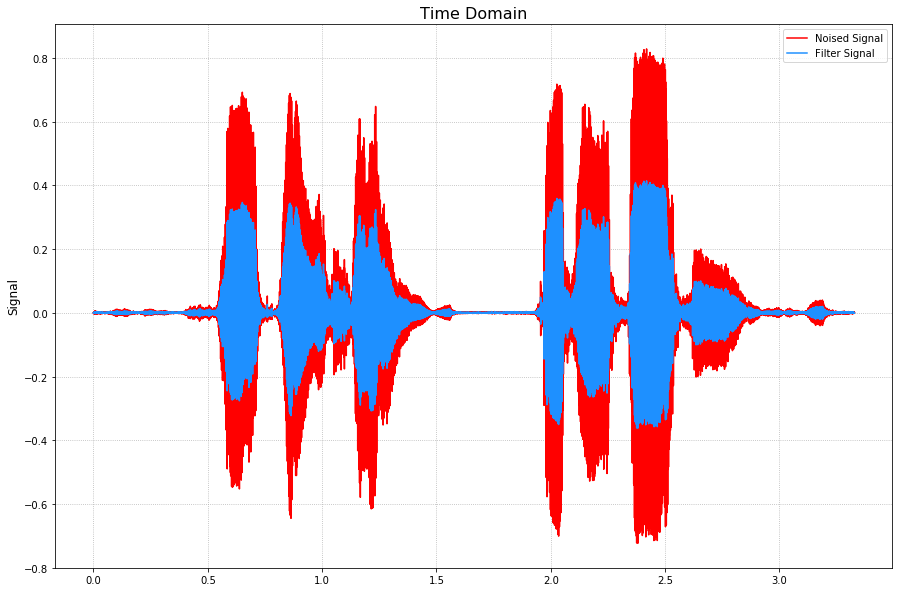

In [178]:
filter_sigs = nf.ifft(ca)

plt.figure(figsize=(15,10))
plt.title('Time Domain',fontsize=16)
plt.ylabel('Signal',fontsize=12)
plt.grid(linestyle=':')

plt.plot(times,signals,color='red',label='Noised Signal')
plt.plot(times,filter_sigs,color='dodgerblue',label='Filter Signal')
plt.legend()


In [179]:
filter_sigs = (filter_sigs*(2**15)).astype('i2')
wav.write('filter2.wav',sample_rate,filter_sigs)

C:\Anaconda3\envs\tensorflow-gpu2\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.
